<a href="https://colab.research.google.com/github/yeahjinjeong/ITmining2022/blob/main/1201%ED%83%90%EC%83%893.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 구글 스토어 랭킹에 영향을 미치는 요소

## 8조

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


모든 열 보이기 설정

In [4]:
pd.set_option('display.max_columns', None)

google 변수에 데이터프레임 불러오기

In [6]:
google = pd.read_csv("/content/drive/My Drive/Colab Notebooks/team_project/Google-Playstore.csv")

google 은 수정 전 용도,

수정할 용도로 gps 변수에 google 데이터 프레임 복사

In [7]:
gps = google
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident Irénée NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,Climate Smart Tech2,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,4.1 and up,Rafal Milek-Horodyski,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312939,大俠客—熱血歸來,com.rxsj.ssjj,Role Playing,4.3,16775.0,"100,000+",100000.0,337109,True,0.0,USD,77M,4.1 and up,ALICE GAME,http://www.4399sy.com.hk/,ssjjcomhk@gmail.com,NaN,"Jun 01, 2021",Teen,http://a.4399sy.com.hk/user/aggreement,False,False,False,2021-06-16 12:59:18
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100+,100.0,430,True,0.0,USD,44M,4.1 and up,"3Dream Studios, LLC",http://www.oru.edu/,3DreamDeveloper@gmail.com,"Jan 17, 2018","Feb 02, 2018",Everyone,http://www.oru.edu/about-oru/privacy-policy.php,False,False,False,2021-06-16 12:59:19
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100+,100.0,202,True,0.0,USD,29M,5.0 and up,appoworld,NaN,appoworld.official@gmail.com,"Aug 19, 2018","Aug 19, 2018",Everyone,https://appoworld.000webhostapp.com/datastruct...,False,False,False,2021-06-16 12:59:19
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,"1,000+",1000.0,2635,True,0.0,USD,10M,5.0 and up,Bhakti,https://a70f78905.app-ads-txt.com,ruchisono@gmail.com,"Aug 1, 2016","May 05, 2021",Everyone,https://docs.google.com/document/d/1x-9reZuLRX...,True,False,False,2021-06-16 12:59:19


In [6]:
gps.shape

(2312944, 24)

In [7]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [ ]:
gps.describe(include='all')

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
count,2312942,2312944,2312944,2.290061e+06,2.290061e+06,2312837,2.312837e+06,2.312944e+06,2312944,2.312944e+06,2312809,2312748,2306414,2312911,1552109,2312913,2241891,2312944,2312944,1891991,2312944,2312944,2312944,2312944
unique,2177944,2312944,48,NaN,NaN,22,NaN,NaN,2,NaN,15,1657,154,758371,810440,950456,4158,3918,6,977743,2,2,2,67374
top,Tic Tac Toe,com.ishakwe.gakondo,Education,NaN,NaN,100+,NaN,NaN,True,NaN,USD,Varies with device,4.1 and up,Subsplash Inc,http://www.subsplash.com/,support@classplus.co,"Jun 16, 2020","Jun 10, 2021",Everyone,http://www.subsplash.com/legal/privacy,False,False,False,2021-06-16 07:35:57
freq,382,1,241090,NaN,NaN,443368,NaN,NaN,2267876,NaN,2311548,74777,604465,5422,7519,10345,2051,11186,2022089,7481,1162170,2117635,2312091,56
mean,NaN,NaN,NaN,2.203152e+00,2.864839e+03,NaN,1.834452e+05,3.202017e+05,NaN,1.034992e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,2.106223e+00,2.121626e+05,NaN,1.513144e+07,2.355495e+07,NaN,2.633127e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,5.000000e+01,8.400000e+01,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2.900000e+00,6.000000e+00,NaN,5.000000e+02,6.950000e+02,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.300000e+00,4.200000e+01,NaN,5.000000e+03,7.354000e+03,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


raw data의 결측치

In [8]:
display(gps.isna().sum())

App Name                  2
App Id                    0
Category                  0
Rating                22883
Rating Count          22883
Installs                107
Minimum Installs        107
Maximum Installs          0
Free                      0
Price                     0
Currency                135
Size                    196
Minimum Android        6530
Developer Id             33
Developer Website    760835
Developer Email          31
Released              71053
Last Updated              0
Content Rating            0
Privacy Policy       420953
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

In [ ]:
curr_count = gps['Currency'].value_counts()
print(curr_count) 

USD    2311548
XXX       1236
EUR          6
INR          5
GBP          3
CAD          2
VND          1
BRL          1
KRW          1
TRY          1
RUB          1
SGD          1
AUD          1
PKR          1
ZAR          1
Name: Currency, dtype: int64


In [9]:
price_count = gps['Price'].value_counts()
print(price_count) 

0.000000     2268011
0.990000       11851
1.990000        5817
2.990000        3921
1.490000        3823
              ...   
8.205856           1
1.030097           1
13.530000          1
3.550000           1
18.903596          1
Name: Price, Length: 1063, dtype: int64


4로 시작하는 버전이 가장 많은 것을 확인

In [10]:
andver_count = gps['Minimum Android'].value_counts()
print(andver_count) 

4.1 and up      604465
5.0 and up      396998
4.4 and up      390311
4.0.3 and up    180482
4.0 and up      153441
                 ...  
2.3 - 3.2            1
6.0 - 7.1.1          1
2.3 - 8.0            1
3.0 - 7.1.1          1
2.3.3 - 6.0          1
Name: Minimum Android, Length: 154, dtype: int64


https://zephyrus1111.tistory.com/44

모델에 필요하지 않은 변수들 삭제

axis = 1 은 열 삭제

axis = 0 은 행 삭제

In [11]:
#gps.drop(columns='Scraped Time', inplace=True)
gps = gps.drop('Scraped Time', axis=1)
gps = gps.drop('Developer Id', axis=1)
gps = gps.drop('Developer Website', axis=1)
gps = gps.drop('Developer Email', axis=1)
gps = gps.drop('Privacy Policy', axis=1)
gps = gps.drop('Installs', axis=1)
gps = gps.dropna(subset=['App Name'],axis=0)
gps = gps.dropna(subset=['Currency'],axis=0)
gps = gps.dropna(subset=['Size'],axis=0)
gps = gps.dropna(subset=['Released'],axis=0)

NA 값 0으로 대체 하기

In [12]:
gps.loc[gps['Rating'] != gps['Rating'], 'Rating'] = 0
gps.loc[gps['Rating Count'] != gps['Rating Count'], 'Rating Count'] = 0

변수 이름 바꾸기

Installs 변수를 삭제한 대신, Minimum 을 범위로, Maximum을 설치 수로

In [13]:
gps = gps.rename (columns = {'Minimum Installs': 'Installs Range'})
gps = gps.rename (columns = {'Maximum Installs': 'Installs'})

In [13]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,10M,7.1 and up,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9M,5.0 and up,"May 21, 2020","May 06, 2021",Everyone,True,False,False
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8M,4.0.3 and up,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,True,0.0,USD,6.2M,4.1 and up,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10M,4.1 and up,"May 22, 2018","Dec 14, 2018",Everyone,True,False,False
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,True,0.0,USD,44M,4.1 and up,"Jan 17, 2018","Feb 02, 2018",Everyone,False,False,False
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,True,0.0,USD,29M,5.0 and up,"Aug 19, 2018","Aug 19, 2018",Everyone,False,False,False
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10M,5.0 and up,"Aug 1, 2016","May 05, 2021",Everyone,True,False,False


안드로이드 버전 중 결측치나, "Varies with device" 값들을 가장 빈도수가 높았던 버전값으로 대체함.

이는 이후 독립변수의 수치화를 위한 것임

In [14]:
gps.loc[gps['Minimum Android'] != gps['Minimum Android'], 'Minimum Android'] = "4.1 and up"
gps.loc[gps['Minimum Android'] == "Varies with device", 'Minimum Android'] = "4.1 and up"

결측치 0으로 전처리 완료

In [15]:
display(gps.isna().sum())

App Name            0
App Id              0
Category            0
Rating              0
Rating Count        0
Installs Range      0
Installs            0
Free                0
Price               0
Currency            0
Size                0
Minimum Android     0
Released            0
Last Updated        0
Content Rating      0
Ad Supported        0
In App Purchases    0
Editors Choice      0
dtype: int64

수치화 작업을 위해 object형인 값들을 우선 string형으로 바꿈

In [15]:
gps["Released"]=gps["Released"].apply(str)
gps["Last Updated"]=gps["Last Updated"].apply(str)
gps["Minimum Android"]=gps["Minimum Android"].apply(str)

string형으로 바꿔야 수정 가능하기 때문 -

출시일과 최근업데이트날짜는 값 전체의 뒤 네자리(연도)만 남김

안드로이드 버전은 맨 앞 글자(버전의 대분류)만 남김

In [16]:
gps['Released'] = gps['Released'].map(lambda x:x[-4:])
gps['Last Updated'] = gps['Last Updated'].map(lambda x:x[-4:])
gps["Minimum Android"]=gps["Minimum Android"].map(lambda x:x[0])

string 값들을 전부 수치화해줌

In [17]:
gps = gps.astype({'Released':int, 'Last Updated':int, 'Minimum Android':int})

최근 업데이트연도에서 출시연도를 빼서 업데이트 여부를 알아볼거임

In [18]:
gps['Update'] = gps['Last Updated']-gps['Released']

두 값의 차이가 0이거나 0보다 작으면 업데이트 여부 False
0보다 크면 업데이트 여부 True 로 설정

In [19]:
gps.loc[(gps['Update'] <= 0), 'Update'] = False
gps.loc[(gps['Update'] > 0), 'Update'] = True

display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,10M,7,2020,2020,Everyone,False,False,False,False
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9M,5,2020,2021,Everyone,True,False,False,True
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,True,0.0,USD,3.7M,4,2019,2019,Everyone,False,False,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8M,4,2018,2018,Everyone,True,False,False,False
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,True,0.0,USD,6.2M,4,2020,2018,Everyone,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10M,4,2018,2018,Everyone,True,False,False,False
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,True,0.0,USD,44M,4,2018,2018,Everyone,False,False,False,False
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,True,0.0,USD,29M,5,2018,2018,Everyone,False,False,False,False
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10M,5,2016,2021,Everyone,True,False,False,True


In [24]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241856 entries, 0 to 2312943
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs Range    float64
 6   Installs          int64  
 7   Free              bool   
 8   Price             float64
 9   Currency          object 
 10  Size              object 
 11  Minimum Android   int64  
 12  Released          int64  
 13  Last Updated      int64  
 14  Content Rating    object 
 15  Ad Supported      bool   
 16  In App Purchases  bool   
 17  Editors Choice    bool   
 18  Update            object 
dtypes: bool(4), float64(4), int64(4), object(7)
memory usage: 282.2+ MB


Size의 단위를 고려해 단위를 통일시켜주는 작업을 할 거임

Varies with device값은 다 00으로 바꿨는데 이는 뒤에서 전체적으로 맨 마지막 자리 글자를 삭제할 때 0만 남도록 하기 위함임

In [20]:
gps.loc[gps['Size'] == "Varies with device", 'Size'] = "00"

object -> string

In [21]:
gps["Size"] = gps["Size"].apply(str)

사이즈 변수값의 맨마지막 글자 (단위) ex. k, M, G .. 를 unit이라는 파생변수를 만들어 데이터프레임에 저장함

In [22]:
gps['unit'] = gps['Size'].map(lambda x:x[-1:])

단위개수를 알아보자

In [23]:
unit_count = gps['unit'].value_counts()
print(unit_count) 

M    2155313
0      51245
k      35286
G         12
Name: unit, dtype: int64


unit변수에서 저 단위들을 수치로 변환

In [24]:
gps.loc[(gps['unit'] == 'M'), 'unit'] = 1000
gps.loc[(gps['unit'] == 'G'), 'unit'] = 1000000
gps.loc[(gps['unit'] == 'k'), 'unit'] = 1
gps.loc[(gps['unit'] == '0'), 'unit'] = 0

In [30]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,10M,7,2020,2020,Everyone,False,False,False,False,1000
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9M,5,2020,2021,Everyone,True,False,False,True,1000
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,True,0.0,USD,3.7M,4,2019,2019,Everyone,False,False,False,False,1000
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8M,4,2018,2018,Everyone,True,False,False,False,1000
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,True,0.0,USD,6.2M,4,2020,2018,Everyone,False,False,False,False,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10M,4,2018,2018,Everyone,True,False,False,False,1000
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,True,0.0,USD,44M,4,2018,2018,Everyone,False,False,False,False,1000
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,True,0.0,USD,29M,5,2018,2018,Everyone,False,False,False,False,1000
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10M,5,2016,2021,Everyone,True,False,False,True,1000


이제 Size 변수에서 맨 마지막 글자 (단위 글자)를 다 삭제해줌

In [25]:
gps['Size'] = gps['Size'].map(lambda x:x[:-1])
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,10,7,2020,2020,Everyone,False,False,False,False,1000
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9,5,2020,2021,Everyone,True,False,False,True,1000
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,True,0.0,USD,3.7,4,2019,2019,Everyone,False,False,False,False,1000
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8,4,2018,2018,Everyone,True,False,False,False,1000
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,True,0.0,USD,6.2,4,2020,2018,Everyone,False,False,False,False,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10,4,2018,2018,Everyone,True,False,False,False,1000
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,True,0.0,USD,44,4,2018,2018,Everyone,False,False,False,False,1000
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,True,0.0,USD,29,5,2018,2018,Everyone,False,False,False,False,1000
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10,5,2016,2021,Everyone,True,False,False,True,1000


Size 값들 중에 중간에 콤마(,)가 찍혀있는 값들이 있어서 수치화가 안되는 상태임
ex 12,234 같은

따라서 ,를 공백으로 바꿔줌(제거함)

In [26]:
gps['Size'] = gps['Size'].str.replace(',', '') ## 데이터, -> 소프트웨어

이제 깨끗한 string 숫자들을 실수형(float)과 정수형(int)으로 바꿔줌

계산을 하기 위함임

In [27]:
gps = gps.astype({'Size':float, 'unit':int})

Size 열과 unit 열을 곱해서 단위를 통일시키고 새로운 변수에 저장함

In [28]:
gps['k_Size'] = gps['Size']*gps['unit']

In [37]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Size,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,unit,k_Size
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,True,0.0,USD,10.0,7,2020,2020,Everyone,False,False,False,False,1000,10000.0
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,True,0.0,USD,2.9,5,2020,2021,Everyone,True,False,False,True,1000,2900.0
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,True,0.0,USD,3.7,4,2019,2019,Everyone,False,False,False,False,1000,3700.0
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,True,0.0,USD,1.8,4,2018,2018,Everyone,True,False,False,False,1000,1800.0
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,True,0.0,USD,6.2,4,2020,2018,Everyone,False,False,False,False,1000,6200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,True,0.0,USD,10.0,4,2018,2018,Everyone,True,False,False,False,1000,10000.0
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,True,0.0,USD,44.0,4,2018,2018,Everyone,False,False,False,False,1000,44000.0
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,True,0.0,USD,29.0,5,2018,2018,Everyone,False,False,False,False,1000,29000.0
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,True,0.0,USD,10.0,5,2016,2021,Everyone,True,False,False,True,1000,10000.0


단위 통일 전, size unit 변수는 필요없어져서 열 삭제함
그 후 k_Size도 보기 좋게 이름 바꿔줌

In [29]:
gps = gps.drop('Size', axis=1)
gps = gps.drop('unit', axis=1)
gps = gps.rename (columns = {'k_Size': 'Size(k)'})

In [40]:
gps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241856 entries, 0 to 2312943
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   App Name          object 
 1   App Id            object 
 2   Category          object 
 3   Rating            float64
 4   Rating Count      float64
 5   Installs Range    float64
 6   Installs          int64  
 7   Free              bool   
 8   Price             float64
 9   Currency          object 
 10  Minimum Android   int64  
 11  Released          int64  
 12  Last Updated      int64  
 13  Content Rating    object 
 14  Ad Supported      bool   
 15  In App Purchases  bool   
 16  Editors Choice    bool   
 17  Update            object 
 18  Size(k)           float64
dtypes: bool(4), float64(5), int64(4), object(6)
memory usage: 282.2+ MB


In [ ]:
sns.set_style("whitegrid")

bool형 값들을 수치로 바꿈

In [30]:
gps=gps.replace({'Free':True, 'In App Purchases':True, 'Editors Choice':True, 'Update':True},1)
gps=gps.replace({'Free':False, 'In App Purchases':False, 'Editors Choice':False, 'Update':False},0)

installs 수로 줄세운 랭킹 변수도 추가해봄

In [31]:
gps['Ranking'] = gps['Installs'].rank(ascending = False).astype('int')

In [43]:
display(gps)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,Size(k),Ranking
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10.0,15,1,0.0,USD,7,2020,2020,Everyone,False,0,0,0,10000.0,2034896
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,5000.0,7662,1,0.0,USD,5,2020,2021,Everyone,True,0,0,1,2900.0,553657
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50.0,58,1,0.0,USD,4,2019,2019,Everyone,False,0,0,0,3700.0,1773155
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10.0,19,1,0.0,USD,4,2018,2018,Everyone,True,0,0,0,1800.0,1996589
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100.0,478,1,0.0,USD,4,2020,2018,Everyone,False,0,0,0,6200.0,1224943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312938,Lero TOEFL Recorder + Timer,com.toefltimer,Education,3.4,17.0,1000.0,1980,1,0.0,USD,4,2018,2018,Everyone,True,0,0,0,10000.0,855147
2312940,ORU Online,com.threedream.oruonline,Education,0.0,0.0,100.0,430,1,0.0,USD,4,2018,2018,Everyone,False,0,0,0,44000.0,1253614
2312941,Data Structure,datastructure.appoworld.datastucture,Education,0.0,0.0,100.0,202,1,0.0,USD,5,2018,2018,Everyone,False,0,0,0,29000.0,1457914
2312942,Devi Suktam,ishan.devi.suktam,Music & Audio,3.5,8.0,1000.0,2635,1,0.0,USD,5,2016,2021,Everyone,True,0,0,1,10000.0,786318


In [32]:
gps.sort_values('Installs', ascending = False).head(30)

,App Name,App Id,Category,Rating,Rating Count,Installs Range,Installs,Free,Price,Currency,Minimum Android,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Editors Choice,Update,Size(k),Ranking
2155096,Google Play services,com.google.android.gms,Tools,4.2,35128398.0,1.000000e+10,12057627016,1,0.0,USD,4,2012,2021,Everyone,False,0,0,1,0.0,1
881403,YouTube,com.google.android.youtube,Video Players & Editors,4.4,112440547.0,5.000000e+09,9766230924,1,0.0,USD,4,2010,2021,Teen,True,0,0,1,0.0,2
1773294,Google,com.google.android.googlequicksearchbox,Tools,4.2,19798962.0,5.000000e+09,9154248491,1,0.0,USD,4,2010,2021,Everyone,True,0,0,1,0.0,3
1060335,Google Text-to-Speech,com.google.android.tts,Tools,4.1,254700.0,5.000000e+09,9034404884,1,0.0,USD,4,2013,2021,Everyone,False,0,0,1,0.0,4
944254,Google Chrome: Fast & Secure,com.android.chrome,Communication,4.1,31481796.0,5.000000e+09,8925640788,1,0.0,USD,4,2012,2021,Everyone,False,0,0,1,0.0,5
2099458,Gmail,com.google.android.gm,Communication,4.2,9488421.0,5.000000e+09,8756574289,1,0.0,USD,4,2010,2021,Everyone,True,0,0,1,0.0,6
893676,Google Drive,com.google.android.apps.docs,Productivity,4.3,639307.0,5.000000e+09,7028265259,1,0.0,USD,4,2011,2021,Everyone,False,1,0,1,0.0,7
385470,WhatsApp Messenger,com.whatsapp,Communication,4.0,138557570.0,5.000000e+09,6265637751,1,0.0,USD,4,2010,2021,Everyone,False,0,1,1,0.0,8
167781,Google TV (previously Play Movies & TV),com.google.android.videos,Video Players & Editors,4.0,1825673.0,5.000000e+09,6156518915,1,0.0,USD,4,2011,2021,Teen,False,0,0,1,0.0,9
1830962,Google Photos,com.google.android.apps.photos,Photography,4.5,35369236.0,5.000000e+09,5754179589,1,0.0,USD,4,2015,2021,Everyone,False,0,0,1,0.0,10


랭킹에 영향 -> Ad Supported 1-0 이진으로 영향 미치는 요인

# 시각화

카테고리별 빈도수

In [83]:
gps['Category'].value_counts()

Education                  236115
Music & Audio              153451
Tools                      138333
Business                   136547
Entertainment              135485
Books & Reference          115537
Lifestyle                  115338
Personalization             88860
Health & Fitness            80722
Productivity                75274
Shopping                    71570
Food & Drink                71023
Travel & Local              64881
Finance                     62125
Arcade                      52490
Puzzle                      49914
Casual                      48873
Communication               46144
Sports                      45813
Social                      43132
News & Magazines            41871
Photography                 35163
Medical                     30125
Action                      26624
Maps & Navigation           25052
Adventure                   22540
Simulation                  22476
Educational                 20736
Art & Design                18310
Auto & Vehicle

상위 10개

In [52]:
cate_count = gps['Category'].value_counts().head(10)
print(cate_count) 

Education            236115
Music & Audio        153451
Tools                138333
Business             136547
Entertainment        135485
Books & Reference    115537
Lifestyle            115338
Personalization       88860
Health & Fitness      80722
Productivity          75274
Name: Category, dtype: int64


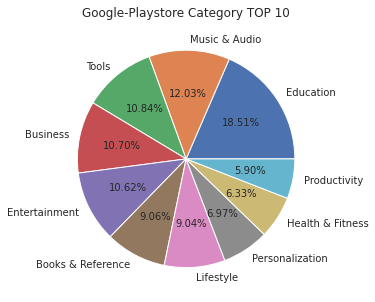

In [103]:
cat_x = cate_count.index
cat_y = cate_count.values

plt.title("Google-Playstore Category TOP 10")
plt.pie(cat_y, labels = cat_x, autopct = '%1.2f%%', textprops = {'fontsize': 10})
plt.show()

In [37]:
means = gps.groupby('Category').mean()
display(means.head())

,Rating,Rating Count,Installs Range,Installs,Free,Price,Minimum Android,Released,Last Updated,Ad Supported,In App Purchases,Editors Choice,Update,Size(k),Ranking
Category,,,,,,,,,,,,,,,
Action,2.699842,20533.133451,645448.895658,1.139309e+06,0.978403,0.066822,3.981070,2018.391376,2019.154147,0.817345,0.275391,0.002704,0.347544,40031.247446,9.713879e+05
Adventure,2.809193,5748.798536,237310.707143,4.326925e+05,0.959006,0.168250,3.885670,2018.519432,2019.160248,0.784871,0.203727,0.001464,0.309583,35361.617169,9.756014e+05
Arcade,2.448781,4604.253953,272706.230939,4.833972e+05,0.985693,0.097895,3.912193,2018.319585,2018.954696,0.791351,0.194113,0.000343,0.281235,26044.706782,1.284425e+06
Art & Design,1.956292,869.576352,60763.935609,9.872258e+04,0.990606,0.089648,4.003113,2018.850191,2019.477499,0.719552,0.045440,0.000328,0.358602,15356.538012,1.110462e+06
Auto & Vehicles,2.046468,698.989858,91575.295873,1.758592e+05,0.983785,0.124625,4.377005,2018.585259,2019.720342,0.265625,0.050884,0.000059,0.525236,17275.020342,1.142704e+06


카테고리별 평점 평균

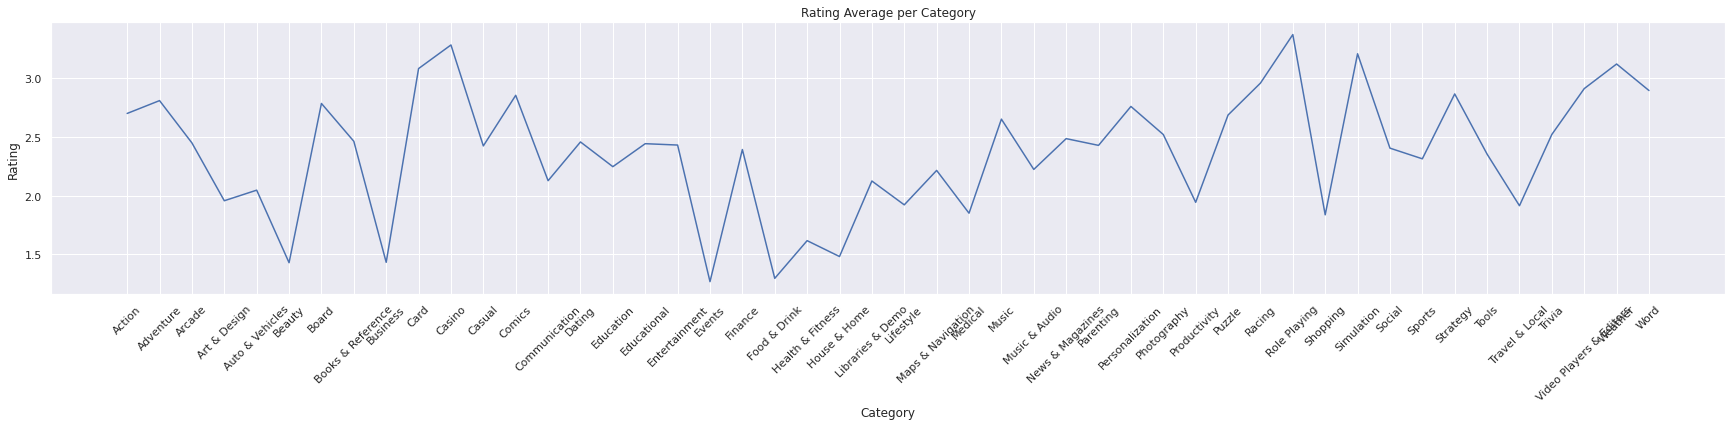

In [93]:
plt.title("Rating Average per Category")

sns.set(rc={'figure.figsize':(30, 5)}) 
plt.xticks(rotation=45)
sns.lineplot(data = means, x = 'Category', y = 'Rating')

In [71]:
released_count = gps['Released'].value_counts()
print(released_count) 

2020    544872
2019    480659
2018    334558
2017    259684
2021    180505
2016    167110
2015    115431
2014     71813
2013     42476
2012     25747
2011     14360
2010      4641
Name: Released, dtype: int64


연도별 출시앱 수 

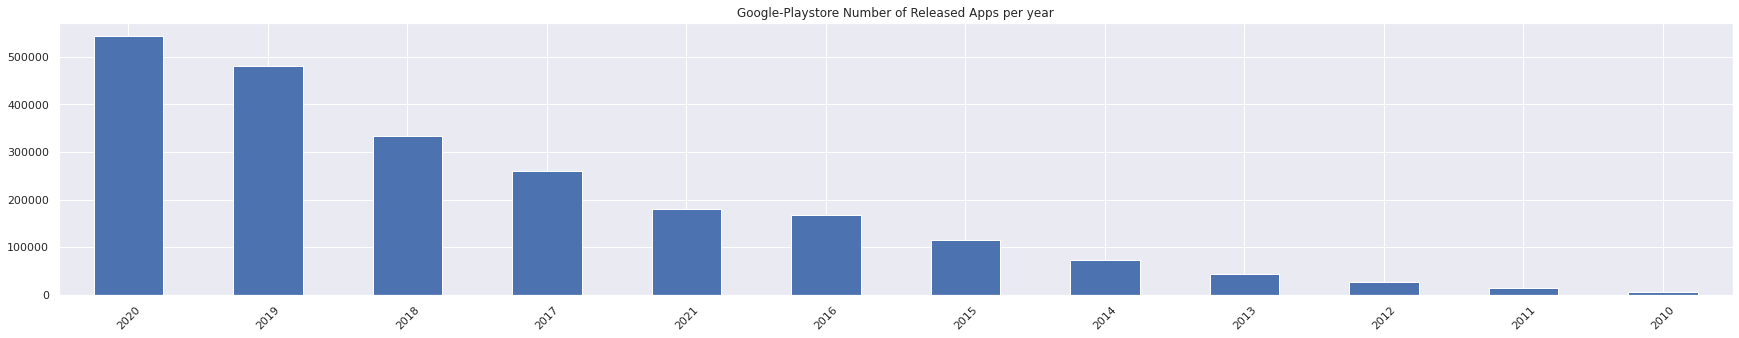

In [102]:
plt.title("Google-Playstore Number of Released Apps per year")
plt.rcParams["figure.figsize"] = [10, 5]
plt.xticks(rotation=45)

released_count[:].plot.bar(rot=45)

In [62]:
Ins_Cat = gps.groupby('Category')['Installs'].sum()
order_sorted = Ins_Cat.sort_values(ascending=False)[:10]
print(order_sorted)

Category
Tools                      108145713137
Communication               71757720396
Productivity                44072927308
Photography                 31279543449
Video Players & Editors     30497378962
Action                      30332969853
Entertainment               30118984949
Casual                      29885446521
Arcade                      25373521461
Social                      24555579363
Name: Installs, dtype: int64


In [85]:
education = gps.loc[gps['Category'] == 'Education']
entertainment = gps.loc[gps['Category'] == 'Entertainment']
casino = gps.loc[gps['Category'] == 'Casino']

In [73]:
CR_count = gps['Content Rating'].value_counts()
print(CR_count) 

Everyone           1959901
Teen                190169
Mature 17+           58676
Everyone 10+         32828
Unrated                152
Adults only 18+        130
Name: Content Rating, dtype: int64


카테고리별 연령 그룹 알아보기

In [86]:
Edu_CR = education['Content Rating'].value_counts()
Ent_CR = entertainment['Content Rating'].value_counts()
Casino_CR = casino['Content Rating'].value_counts()
print("Content Rating in Education\n")
print(Edu_CR)
print("\nContent Rating in Entertainment\n")
print(Ent_CR)
print("\nContent Rating in Casino\n")
print(Casino_CR)

Content Rating in Education

Everyone           227338
Teen                 6305
Everyone 10+         1674
Mature 17+            787
Adults only 18+         7
Unrated                 4
Name: Content Rating, dtype: int64

Content Rating in Entertainment

Everyone           110074
Teen                16093
Mature 17+           7681
Everyone 10+         1584
Unrated                27
Adults only 18+        26
Name: Content Rating, dtype: int64

Content Rating in Casino

Teen               4449
Everyone            405
Mature 17+           52
Adults only 18+      11
Everyone 10+          7
Name: Content Rating, dtype: int64


모든 앱의 권장연령 비율

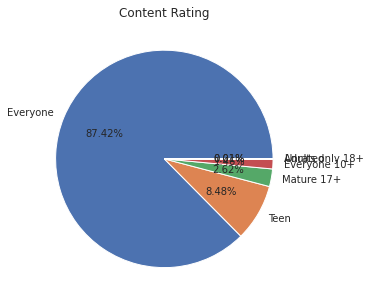

In [98]:
cr_x = CR_count.index
cr_y = CR_count.values

plt.title("Content Rating")
plt.pie(cr_y, labels = cr_x, autopct = '%1.2f%%', textprops = {'fontsize': 10})
plt.show()

사이즈와 평점의 연관도를 예측하기 위한 산점도

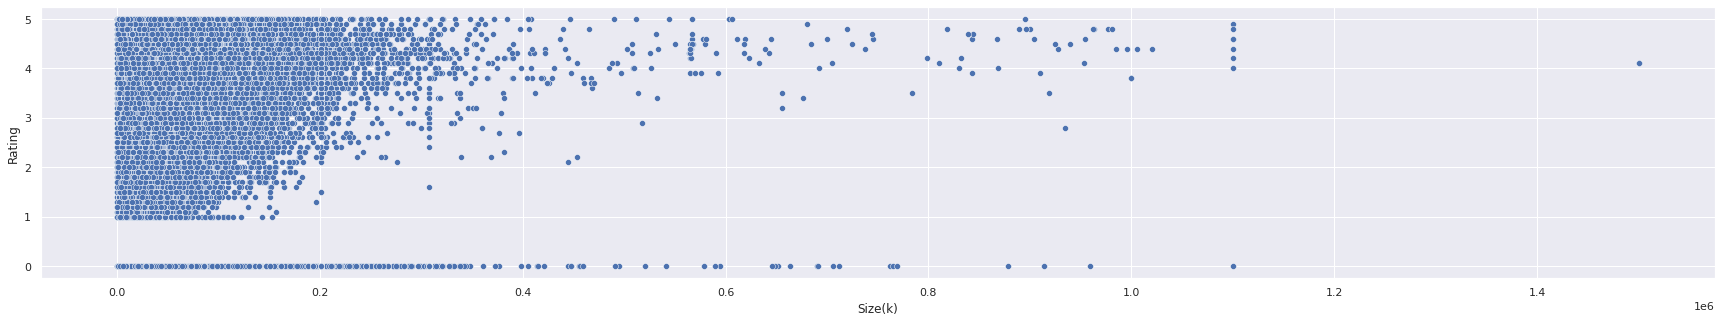

In [101]:
sns.scatterplot(data = gps, x = 'Size(k)', y = 'Rating')

In [ ]:
CR_count = gps['Content Rating'].value_counts()
print(CR_count) 